# DATA WAREHOUSE
**1. Melakukan import beberapa library yang dibutuhkan**

**2. Melakukan import dataset yang dipergunakan**

**3. Melakukan pengecekan dataset dari jumlah kolom tabel dataset dan melakukan print tabel dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules

import datetime

In [ ]:
#import daatasets
#loading data pada dataset yang dipakai

nilai = pd.read_excel('dbpenilaian.xlsx')
nilai.head(50)

,Timestamp,Email Address,KELAS,NAMA SISWA,A1,A2,A3,A4,A5,A6,...,B4,N1,N2,N3,N4,K1,K2,K3,K4,POIN
0,2023-02-03 08:29:13,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 1,Alexander Steve Aldonza,SUDAH,SUDAH,BELUM,SUDAH,SUDAH,BELUM,...,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,BELUM,BELUM,BELUM,NaN
1,2023-02-03 08:30:27,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 2,Albert Aditya Ananda Djuang,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,BELUM,...,BELUM,BELUM,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN
2,2023-02-03 08:31:38,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 3,Ade Chandra,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,BELUM,BELUM,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN
3,2023-02-03 08:32:48,kurli.hariawan@sekolahathalia.sch.id,XII IPS 1,Elaine Mary,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,BELUM,BELUM,SUDAH,SUDAH,SUDAH,BELUM,BELUM,SUDAH,SUDAH,NaN
4,2023-02-03 08:34:04,kurli.hariawan@sekolahathalia.sch.id,XII IPS 2,Christiansen Agassy,SUDAH,SUDAH,SUDAH,SUDAH,BELUM,SUDAH,...,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,BELUM,NaN
5,2023-02-07 09:05:05,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 1,Alexander Steve Aldonza,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,BELUM,BELUM,SUDAH,NaN
6,2023-02-03 08:29:13,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 1,Benjamin Leonardo,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,SUDAH,BELUM,SUDAH,BELUM,SUDAH,BELUM,SUDAH,SUDAH,NaN
7,2023-02-03 08:30:27,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 2,Jozka orlandi siyadi,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,...,BELUM,BELUM,SUDAH,BELUM,SUDAH,BELUM,SUDAH,SUDAH,BELUM,NaN
8,2023-02-03 08:31:38,kurli.hariawan@sekolahathalia.sch.id,XII MIPA 3,Jason Fernando Lie,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN
9,2023-02-03 08:32:48,kurli.hariawan@sekolahathalia.sch.id,XII IPS 1,Shona Gracelyn Nugraha,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,...,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN


In [ ]:
#eksplor dataset yang dipakai dalam bentuk kolom

nilai.columns

Index(['Timestamp', 'Email Address', 'KELAS', 'NAMA SISWA', 'A1', 'A2', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'M10', 'M11', 'M12', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6',
       'G7', 'G8', 'B1', 'B2', 'B3', 'B4', 'N1', 'N2', 'N3', 'N4', 'K1', 'K2',
       'K3', 'K4', 'POIN'],
      dtype='object')

In [ ]:
#melihat full dataset keseluruhan (mengetahui ada berapa banyak kolom dan baris pada datasets)
nilai.shape

(12, 45)

In [ ]:
#menghapus kolom 

nilai = nilai.drop(columns=['KELAS'])

In [ ]:
nilai.head(50)

,Timestamp,Email Address,NAMA SISWA,A1,A2,A3,A4,A5,A6,A7,...,B4,N1,N2,N3,N4,K1,K2,K3,K4,POIN
0,2023-02-03 08:29:13,kurli.hariawan@sekolahathalia.sch.id,Alexander Steve Aldonza,SUDAH,SUDAH,BELUM,SUDAH,SUDAH,BELUM,SUDAH,...,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,BELUM,BELUM,BELUM,NaN
1,2023-02-03 08:30:27,kurli.hariawan@sekolahathalia.sch.id,Albert Aditya Ananda Djuang,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,BELUM,SUDAH,...,BELUM,BELUM,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN
2,2023-02-03 08:31:38,kurli.hariawan@sekolahathalia.sch.id,Ade Chandra,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,BELUM,BELUM,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN
3,2023-02-03 08:32:48,kurli.hariawan@sekolahathalia.sch.id,Elaine Mary,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,BELUM,BELUM,SUDAH,SUDAH,SUDAH,BELUM,BELUM,SUDAH,SUDAH,NaN
4,2023-02-03 08:34:04,kurli.hariawan@sekolahathalia.sch.id,Christiansen Agassy,SUDAH,SUDAH,SUDAH,SUDAH,BELUM,SUDAH,SUDAH,...,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,BELUM,NaN
5,2023-02-07 09:05:05,kurli.hariawan@sekolahathalia.sch.id,Alexander Steve Aldonza,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,BELUM,...,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,BELUM,BELUM,SUDAH,NaN
6,2023-02-03 08:29:13,kurli.hariawan@sekolahathalia.sch.id,Benjamin Leonardo,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,SUDAH,BELUM,SUDAH,BELUM,SUDAH,BELUM,SUDAH,SUDAH,NaN
7,2023-02-03 08:30:27,kurli.hariawan@sekolahathalia.sch.id,Jozka orlandi siyadi,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,BELUM,BELUM,SUDAH,BELUM,SUDAH,BELUM,SUDAH,SUDAH,BELUM,NaN
8,2023-02-03 08:31:38,kurli.hariawan@sekolahathalia.sch.id,Jason Fernando Lie,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,...,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN
9,2023-02-03 08:32:48,kurli.hariawan@sekolahathalia.sch.id,Shona Gracelyn Nugraha,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,SUDAH,...,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,NaN


# PREPROCESSING DATA
**1. Seleksi Data**

**2. Melakukan pengecekan pada kolom tabel apak**


**3. Membuat kolom NAMA SISWA menjadi string**

In [ ]:
nilai['NAMA SISWA'] = nilai['NAMA SISWA'].str.strip()
nilai['A1'] = nilai['A1'].str.strip()
nilai['A2'] = nilai['A2'].str.strip()
nilai['A3'] = nilai['A3'].str.strip()
nilai['A4'] = nilai['A4'].str.strip()
nilai['A5'] = nilai['A5'].str.strip()
nilai['A6'] = nilai['A6'].str.strip()
nilai['A7'] = nilai['A7'].str.strip()
nilai['A8'] = nilai['A8'].str.strip()

nilai['M1'] = nilai['M1'].str.strip()
nilai['M2'] = nilai['M2'].str.strip()
nilai['M3'] = nilai['M3'].str.strip()
nilai['M4'] = nilai['M4'].str.strip()
nilai['M5'] = nilai['M5'].str.strip()
nilai['M6'] = nilai['M6'].str.strip()
nilai['M7'] = nilai['M7'].str.strip()
nilai['M8'] = nilai['M8'].str.strip()
nilai['M9'] = nilai['M9'].str.strip()
nilai['M10'] = nilai['M10'].str.strip()
nilai['M11'] = nilai['M11'].str.strip()
nilai['M12'] = nilai['M12'].str.strip()

nilai['G1'] = nilai['G1'].str.strip()
nilai['G2'] = nilai['G2'].str.strip()
nilai['G3'] = nilai['G3'].str.strip()
nilai['G4'] = nilai['G4'].str.strip()
nilai['G5'] = nilai['G5'].str.strip()
nilai['G6'] = nilai['G6'].str.strip()
nilai['G7'] = nilai['G7'].str.strip()
nilai['G8'] = nilai['G8'].str.strip()

nilai['B1'] = nilai['B1'].str.strip()
nilai['B2'] = nilai['B2'].str.strip()
nilai['B3'] = nilai['B3'].str.strip()
nilai['B4'] = nilai['B4'].str.strip()

nilai['N1'] = nilai['N1'].str.strip()
nilai['N2'] = nilai['N2'].str.strip()
nilai['N3'] = nilai['N3'].str.strip()
nilai['N4'] = nilai['N4'].str.strip()

nilai['K1'] = nilai['K1'].str.strip()
nilai['K2'] = nilai['K2'].str.strip()
nilai['K3'] = nilai['K3'].str.strip()
nilai['K4'] = nilai['K4'].str.strip()



nilai.dropna(axis=0, subset=['NAMA SISWA'], inplace=True)

In [ ]:
nilai['NAMA SISWA'] =  nilai['NAMA SISWA'].astype('str')
nilai = nilai[~(nilai['NAMA SISWA'].str[0] == 'C')]

In [ ]:
murid = nilai.iloc[:,3:11]
murid

,A1,A2,A3,A4,A5,A6,A7,A8
0,SUDAH,SUDAH,BELUM,SUDAH,SUDAH,BELUM,SUDAH,BELUM
1,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,BELUM,SUDAH,SUDAH
2,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH
3,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH
5,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,BELUM,SUDAH
6,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH
7,SUDAH,BELUM,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH
8,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH,SUDAH
9,SUDAH,BELUM,BELUM,SUDAH,SUDAH,BELUM,SUDAH,SUDAH
10,SUDAH,SUDAH,SUDAH,BELUM,SUDAH,SUDAH,BELUM,SUDAH


#DATA TRANSFORMATION
**1. Melakukan fit transform dengan metode ordinal encoder**

**2. Membuat normalisasi dari angka 0.0 dan 1.0 menjadi 0 dan 1**


In [ ]:
ubah = OrdinalEncoder()
murid[["A1", "A2", "A3",
       "A4", "A5", "A6", "A7", "A8"]] = ubah.fit_transform(murid[["A1", "A2", "A3",
       "A4", "A5", "A6", "A7", "A8"]])
murid[["A1", "A2", "A3",
      "A4", "A5", "A6", "A7", "A8"]].head(13)

,A1,A2,A3,A4,A5,A6,A7,A8
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
6,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
8,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
10,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

murid_sets = murid.applymap(encode_units)
murid_sets.head(15)

,A1,A2,A3,A4,A5,A6,A7,A8
0,0,1,0,1,0,0,1,0
1,0,0,1,1,0,0,1,1
2,0,1,1,1,0,1,1,1
3,0,1,1,1,0,1,1,1
5,0,0,1,1,0,1,0,1
6,0,0,1,1,0,1,1,1
7,0,0,1,1,0,1,1,1
8,0,1,1,1,0,1,1,1
9,0,0,0,1,0,0,1,1
10,0,1,1,0,0,1,0,1


# **DATA MINING**
**Min Support = 30% (0.3)**

**Min Threshold dari Lift ratio = 1**

**Tigkat Confidence = 0.8 / 80%**

**1. Membuat frequent_itemsets dengan min supportnya = 0.3 / 30%**

**2. Membuat association rules dengan lift ratio = 1**

**3. Melakukan filterisasi dari hasil apriori dengan confidence = 0.8 / 80%**

**4. Membuat penghitung result dari hasil sisem apriori**

In [ ]:
freq = apriori(murid_sets, min_support=0.3, use_colnames=True)
freq.head(50)

,support,itemsets
0,0.454545,(A2)
1,0.818182,(A3)
2,0.818182,(A4)
3,0.636364,(A6)
4,0.727273,(A7)
5,0.818182,(A8)
6,0.363636,"(A3, A2)"
7,0.363636,"(A4, A2)"
8,0.363636,"(A6, A2)"
9,0.363636,"(A7, A2)"


In [ ]:
rules = association_rules(freq, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A6),(A2),0.636364,0.454545,0.363636,0.571429,1.257143,0.074380,1.272727
1,(A2),(A6),0.454545,0.636364,0.363636,0.800000,1.257143,0.074380,1.818182
2,(A7),(A2),0.727273,0.454545,0.363636,0.500000,1.100000,0.033058,1.090909
3,(A2),(A7),0.454545,0.727273,0.363636,0.800000,1.100000,0.033058,1.363636
4,(A3),(A6),0.818182,0.636364,0.636364,0.777778,1.222222,0.115702,1.636364
...,...,...,...,...,...,...,...,...,...
195,(A4),"(A3, A6, A7, A8)",0.818182,0.454545,0.454545,0.555556,1.222222,0.082645,1.227273
196,(A6),"(A3, A4, A7, A8)",0.636364,0.545455,0.454545,0.714286,1.309524,0.107438,1.590909
197,(A3),"(A7, A4, A6, A8)",0.818182,0.454545,0.454545,0.555556,1.222222,0.082645,1.227273
198,(A7),"(A3, A4, A6, A8)",0.727273,0.545455,0.454545,0.625000,1.145833,0.057851,1.212121


In [ ]:
hasil = rules[(rules['lift'] >= 1) &
              (rules['confidence'] >= 0.8)]

In [ ]:
apr_hasil = hasil.sort_values(by='confidence', ascending=False)
apr_hasil.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(A6, A2, A8)",(A3),0.363636,0.818182,0.363636,1.0,1.222222,0.066116,inf
96,"(A3, A2, A8)",(A6),0.363636,0.636364,0.363636,1.0,1.571429,0.132231,inf
183,"(A3, A6, A7)","(A4, A8)",0.454545,0.727273,0.454545,1.0,1.375000,0.123967,inf
59,"(A7, A6)",(A3),0.454545,0.818182,0.454545,1.0,1.222222,0.082645,inf
64,"(A6, A8)",(A3),0.636364,0.818182,0.636364,1.0,1.222222,0.115702,inf
66,(A6),"(A3, A8)",0.636364,0.727273,0.636364,1.0,1.375000,0.173554,inf
68,"(A3, A7)",(A8),0.545455,0.818182,0.545455,1.0,1.222222,0.099174,inf
139,"(A3, A7)","(A4, A8)",0.545455,0.727273,0.545455,1.0,1.375000,0.148760,inf
74,"(A7, A6)",(A4),0.454545,0.818182,0.454545,1.0,1.222222,0.082645,inf
78,"(A4, A6)",(A8),0.545455,0.818182,0.545455,1.0,1.222222,0.099174,inf


# PATTERN
**1. Grafis Histogram**

**2. Grafis Dot (Persebaran)**

Text(0.5, 1.0, 'Histogram Result Sistem Apriori')

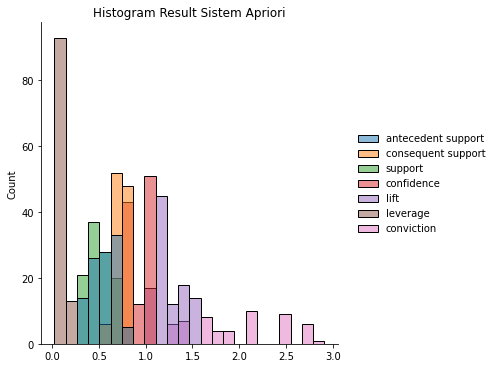

In [41]:
sns.displot(apr_hasil)
plt.title('Histogram Result Sistem Apriori')


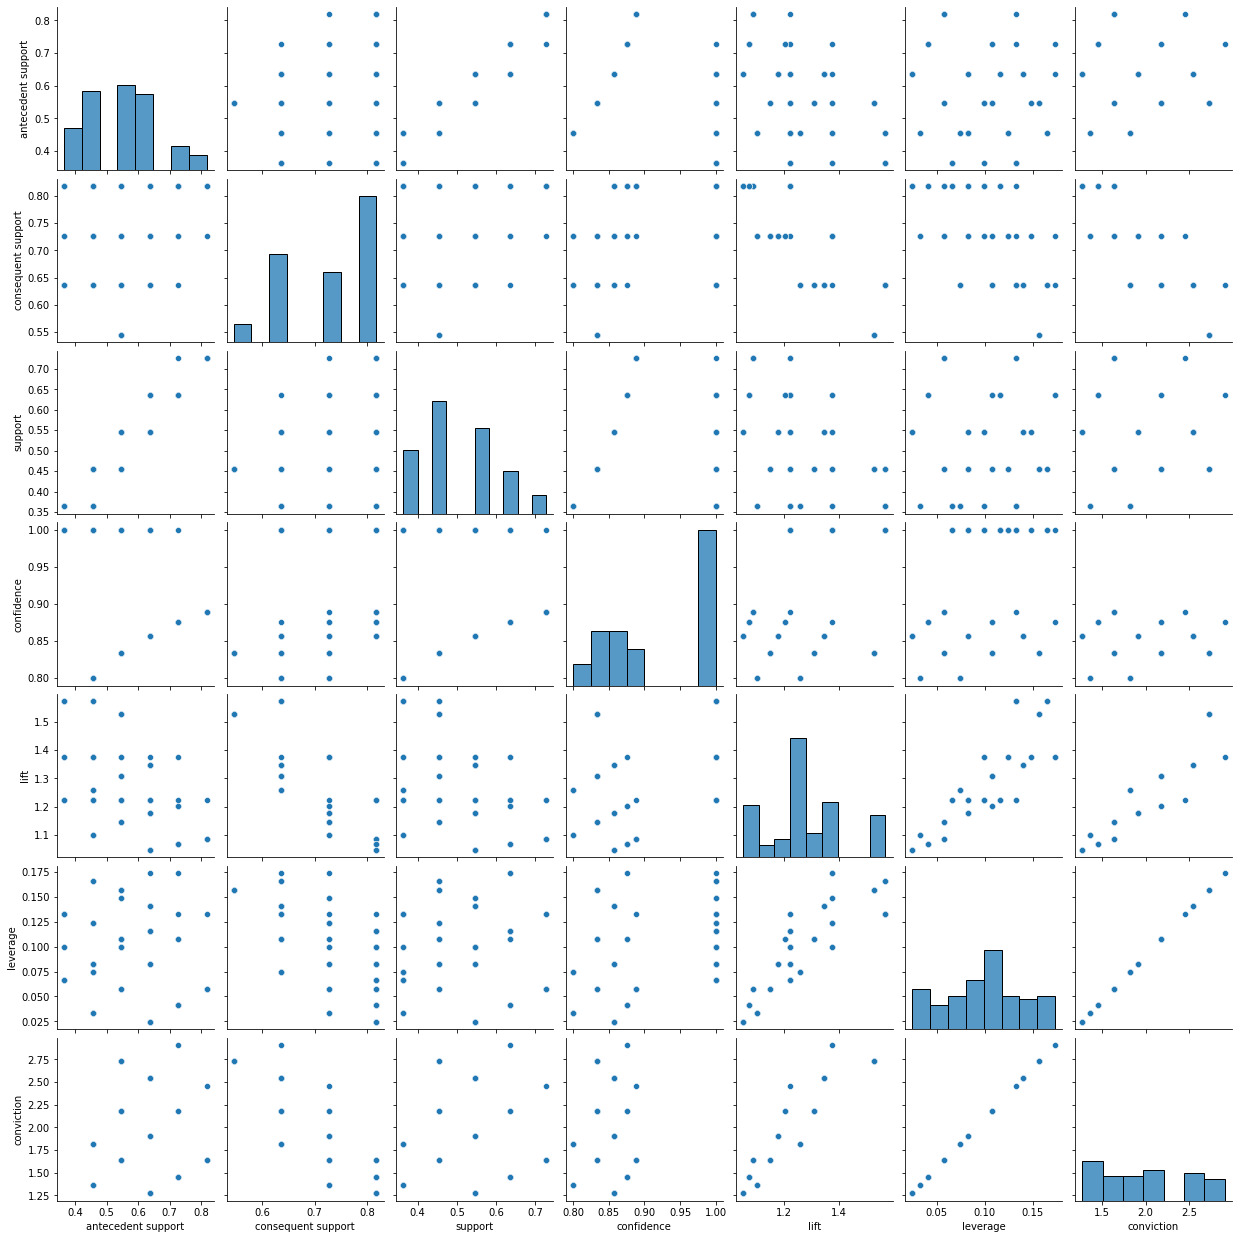

In [51]:
# sns.jointplot(x='confidence', y='consequents', data=apr_hasil)
sns.pairplot(apr_hasil)